In [104]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output
%matplotlib inline 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

In [105]:
df = pd.read_csv("deliveries.csv")
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [106]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

**Description of some of the columns:**
non_striker: Batsman at the non-striker's end.

bye_runs: runs scored by the batting team without the ball making contact with the bat and without the batsmen making an attempt to hit the ball. 

legbye_runs: runs scored by the batting team as extras when the ball touches the batsman's body or equipment, typically the pads, instead of the bat, after the batsman attempts to play a shot.

penalty_runs: runs awarded to the batting team due to various infringements or breaches of the laws of the game by the fielding side.

extra_runs: These runs include wide balls, no-balls, and other penalty runs awarded due to various infringements or breaches of the laws of the game.

player_dismissed: Batsman dismissed in the delivery (if any).

dismissal_kind: Method of dismissal.

fielder: Fielder involved in the dismissal (if applicable).

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [108]:
df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

The regular columns does not have any null values. Other columns such as dismissal_kind and player_dismissed could be null because there were no players dismissed when that ball was played

**Let’s look at the shape of the dataset.**

In [109]:
df.shape

(179078, 21)

There are **179078 rows** and **21 columns** in the dataset

In [110]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## **Total teams in the IPL**

In [111]:
df.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [112]:
df.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)

In [113]:
df.duplicated().sum()

23

There are 23 duplicate values in the dataframe, so we can drop them

In [114]:
df.drop_duplicates(subset=None, keep="first", inplace=True)

# Univariate Analysis
## Categorical columns

In [115]:
teams = df.batting_team.unique().tolist()
teams

['Sunrisers Hyderabad',
 'Royal Challengers Bangalore',
 'Mumbai Indians',
 'Rising Pune Supergiants',
 'Gujarat Lions',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Delhi Capitals']

**These are the teams that participated in IPL**

In [116]:
df.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

**Above are the reasons for getting dismissed**

## Numerical Columns

In [117]:
df.inning.unique()

array([1, 2, 3, 4, 5], dtype=int64)

There are five unique values in the "inning" column: 1, 2, 3, 4, and 5. This suggest that there were upto 5 innings played during the IPL

In [118]:
df.inning.value_counts()

inning
1    92727
2    86232
3       50
4       38
5        8
Name: count, dtype: int64

**Most of the matches are played with either 1 or 2 innings.**

In [119]:
df.over.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

**The matches are of 20 overs**

In [120]:
df[df["is_super_over"]==1].shape[0]

81

There were total **81 super overs played**

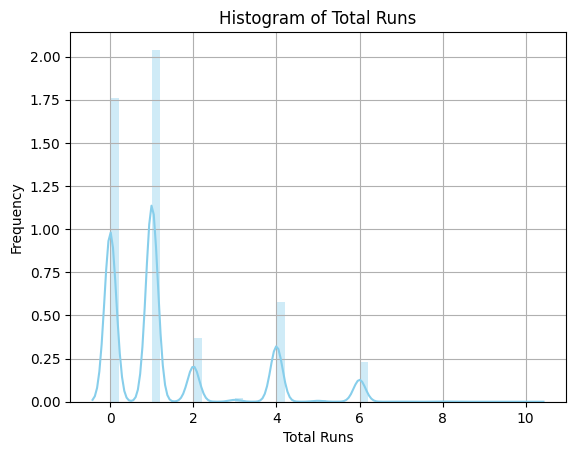

In [121]:
sns.distplot(df['total_runs'],color='skyblue')
plt.title('Histogram of Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

For a single ball most of the runs scored during the matches were between 0-1 runs. We can also find the number of 4's and 6's scored during the match.

In [122]:
df.total_runs.value_counts()

total_runs
1     73048
0     62993
4     20597
2     13124
6      8148
3       688
5       339
8        64
7        38
10       16
Name: count, dtype: int64

* There were total **20,599 fours** and **8,148 sixes** scored during the IPL
* Surprisingly, there were more fours scored as compare to scoring two runs

# Bivariate Analysis

### Batting Team v/s Bowling Team

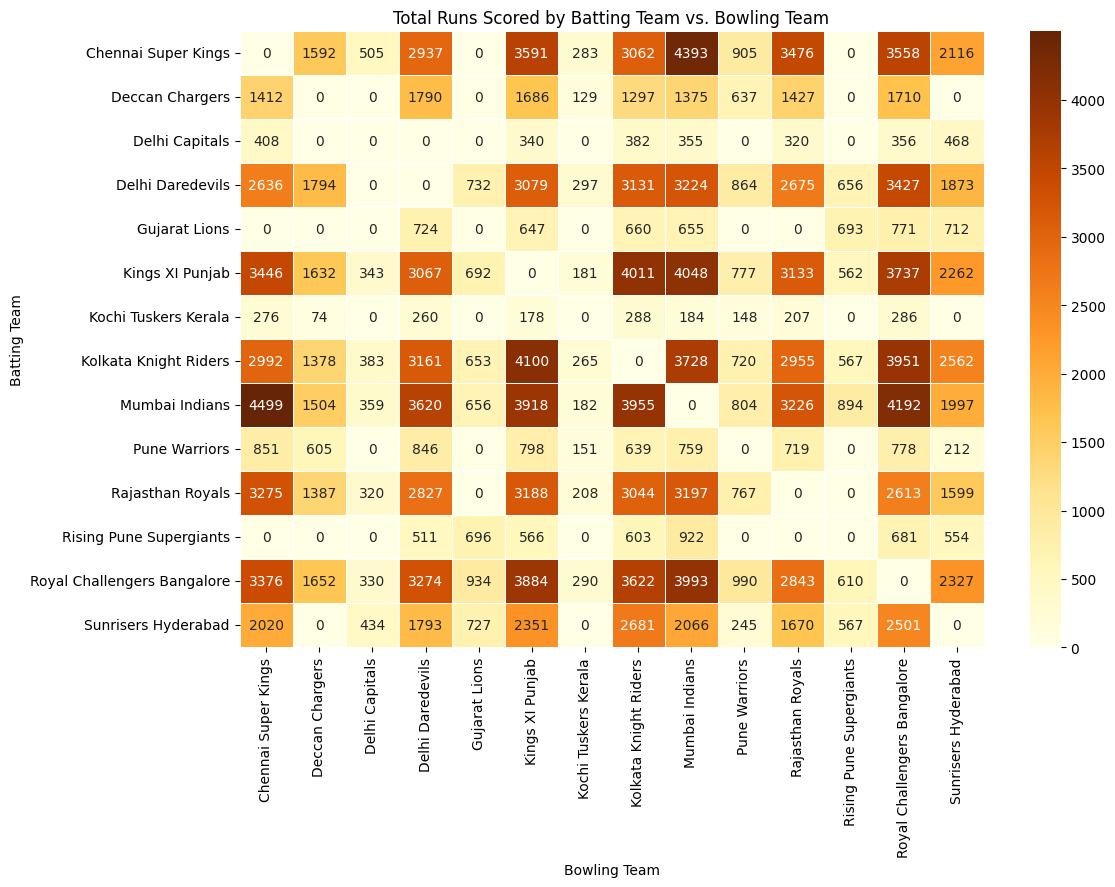

In [123]:
pivot_table = df.pivot_table(index='batting_team', columns='bowling_team', values='total_runs', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrBr', annot=True, fmt='d', linewidths=.5)
plt.title('Total Runs Scored by Batting Team vs. Bowling Team')
plt.xlabel('Bowling Team')
plt.ylabel('Batting Team')
plt.show()

This heatmap provides us with a visual representation of the total runs scored by each batting team against each bowling team, allowing you to analyze their performance across different matchups.

### Top Batsmans in IPL

In [124]:
def update_plot(top_n):
    batsman_total_runs = df.groupby('batsman').agg({"total_runs":"sum", "batting_team":"first"}).reset_index()
    top_batsmen = batsman_total_runs.sort_values(by='total_runs', ascending=False).head(top_n)
    
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(data=top_batsmen, x='batsman', y='total_runs', hue='batting_team', palette='Set2')
    for container in barplot.containers:
        barplot.bar_label(container)
    
    plt.title(f'Total Runs Scored by Top {top_n} Batsmen')
    plt.xlabel('Batsman')
    plt.ylabel('Total Runs')
    plt.xticks(rotation=45)
    plt.show()
    
top_n_widget = widgets.IntSlider(value=10, min=1, max=20, step=1, description='Top N Batsmen:', continuous_update=False)
widgets.interactive(update_plot, top_n=top_n_widget)

interactive(children=(IntSlider(value=10, continuous_update=False, description='Top N Batsmen:', max=20, min=1…

### Top Bowlers who dismissed most players in IPL

In [125]:
def update_plot(top_n):
    bowler_dismissals = df.groupby('bowler').agg({"player_dismissed":"count", "bowling_team":"first"}).reset_index()
    top_bowlers = bowler_dismissals.sort_values(by='player_dismissed', ascending=False).head(top_n)
    
    plt.figure(figsize=(12, 4))
    barplot = sns.barplot(data=top_bowlers, x='bowler', y='player_dismissed', hue='bowling_team', palette='coolwarm')
    for container in barplot.containers:
        barplot.bar_label(container)
    
    plt.title(f'Total Players Dismissed by Top {top_n} Bowlers')
    plt.xlabel('Bowler')
    plt.ylabel('Players Dismissed')
    plt.xticks(rotation=45)
    plt.show()

top_n_widget = widgets.IntSlider(value=10, min=1, max=20, step=1, description='Top N Bowlers:', continuous_update=False)
widgets.interactive(update_plot, top_n=top_n_widget)

interactive(children=(IntSlider(value=10, continuous_update=False, description='Top N Bowlers:', max=20, min=1…

## Top best filders who dismissed maximum players

In [126]:
def update_plot(top_n):
    fielder_dismissal_counts = df.groupby(['fielder', 'dismissal_kind']).size().reset_index(name='dismissal_count')
    fielder_total_dismissals = fielder_dismissal_counts.groupby('fielder')['dismissal_count'].sum().reset_index()
    top_fielders = fielder_total_dismissals.sort_values(by='dismissal_count', ascending=False).head(top_n)
    
    filtered_df = fielder_dismissal_counts[fielder_dismissal_counts['fielder'].isin(top_fielders['fielder'])]
    
    plt.figure(figsize=(20, 5))
    sns.barplot(data=filtered_df, x='fielder', y='dismissal_count', hue='dismissal_kind', palette='Set1')
    
    plt.title(f'Top {top_n} Fielders vs. Dismissal Kind')
    plt.xlabel('Fielder')
    plt.ylabel('Dismissal Count')
    plt.xticks(rotation=90)
    plt.legend(title='Dismissal Kind')
    plt.show()

top_n_widget = widgets.IntSlider(value=10, min=1, max=20, step=1, description='Top N Fielders:', continuous_update=False)
widgets.interactive(update_plot, top_n=top_n_widget)

interactive(children=(IntSlider(value=10, continuous_update=False, description='Top N Fielders:', max=20, min=…

## Analyse the Fours and Sixs scored by top teams

In [127]:
def get_filtered_df(selected_shot):
    if selected_shot == 'Fours':
        filtered_df = df[df['batsman_runs'] == 4]
    elif selected_shot == 'Sixes':
        filtered_df = df[df['batsman_runs'] == 6]
    else:
        filtered_df = pd.DataFrame()
    return filtered_df
    
def update_plot(top_n, selected_shot):
    global filtered_df
    filtered_df = get_filtered_df(selected_shot)
    
    grouped_df = filtered_df.groupby('batting_team')['batsman_runs'].count().sort_values(ascending=False).reset_index()
    grouped_df.rename(columns={'batsman_runs': 'total_shots'}, inplace=True)
    top_teams = grouped_df.head(top_n)
    
    plt.figure(figsize=(10, 8))
    plt.pie(top_teams['total_shots'], labels=top_teams['batting_team'], autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=140, wedgeprops=dict(width=0.3))
    
    plt.title(f'Top {top_n} Teams by Number of {selected_shot}')
    plt.show()

top_n_widget = widgets.IntSlider(value=10, min=1, max=20, step=1, description='Top N Teams:')
shot_options = ['Fours', 'Sixes']
shot_selector = widgets.Dropdown(options=shot_options, value='Fours', description='Shot Type:')
widgets.interactive(update_plot, top_n=top_n_widget, selected_shot=shot_selector)


interactive(children=(IntSlider(value=10, description='Top N Teams:', max=20, min=1), Dropdown(description='Sh…

## Top 10 players who has hit more no of fours

In [128]:
def update_plot(top_n, selected_shot):
    filtered_df = get_filtered_df(selected_shot)
    grouped_df = filtered_df.groupby(['batsman', 'batting_team'])['batsman_runs'].count().sort_values(ascending=False).reset_index().head(top_n)
    grouped_df.rename(columns={'batsman_runs': 'total_shots'}, inplace=True)
    
    plt.figure(figsize=(10, 5))
    barplot = sns.barplot(data=grouped_df, x='batsman', y='total_shots', hue='batting_team', palette='Paired')
    for container in barplot.containers:
        barplot.bar_label(container)
    
    plt.title(f'Top {top_n} Players Who Have Hit the Most {selected_shot}')
    plt.xlabel('Batsman')
    plt.ylabel(f'Number of {selected_shot}')
    plt.xticks(rotation=45)
    plt.show()

top_n_widget = widgets.IntSlider(value=10, min=1, max=20, step=1, description='Top N Players:')
shot_options = ['Fours', 'Sixes']
shot_selector = widgets.Dropdown(options=shot_options, value='Fours', description='Shot Type:')

widgets.interactive(update_plot, top_n=top_n_widget, selected_shot=shot_selector)

interactive(children=(IntSlider(value=10, description='Top N Players:', max=20, min=1), Dropdown(description='…

# Match Dataset

In [129]:
data = pd.read_csv("matches.csv")
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [130]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

There are columns such as season and data that can be useful to perform some time series analysis

In [131]:
data.shape

(756, 18)

There are **756 rows** and **18 columns** in the dataset

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [133]:
data.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

More than 93% of data is missing, so let's just drop this column

In [134]:
data.drop('umpire3', axis=1, inplace = True)
data[data.isnull().any(axis=1)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
461,462,2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
545,546,2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak


All the city rows with venue **Dubai International Cricket Stadium** is Null and since that stadium is located in Dubai, We can fill those Null values with the city name **"Dubai"**

In [135]:
data['city'].fillna('Dubai', inplace=True)

In [136]:
data.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)

In [137]:
data.duplicated().sum()

0

# Univariate Analysis

## Cities that hosted most of the IPL Matches

In [138]:
data.city.value_counts().head(10)

city
Mumbai        101
Kolkata        77
Delhi          74
Bangalore      66
Hyderabad      64
Chennai        57
Jaipur         47
Chandigarh     46
Pune           38
Durban         15
Name: count, dtype: int64

## Number of Venues in Each City

In [139]:
data.groupby('city')['venue'].nunique().sort_values(ascending=False).head(10)

city
Mumbai           3
Visakhapatnam    2
Chandigarh       2
Hyderabad        2
Mohali           2
Delhi            2
Chennai          2
Pune             2
Bengaluru        2
Raipur           1
Name: venue, dtype: int64

## Top 10 Player of The Match

In [140]:
data.player_of_match.value_counts().head(10)


player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: count, dtype: int64

## Number of Matches played in each season

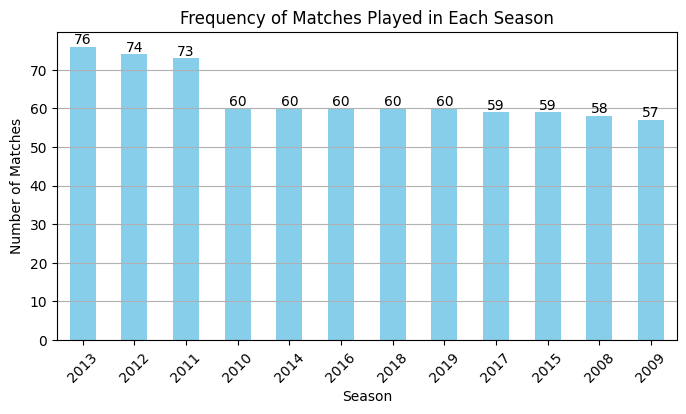

In [141]:
data1 = data.season.value_counts()
plt.figure(figsize=(8, 4))
barplot = data1.plot(kind='bar', color='skyblue')
plt.bar_label(barplot.containers[0])
plt.title('Frequency of Matches Played in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Add gridlines for better readability
plt.show()

## Matches Won by each team

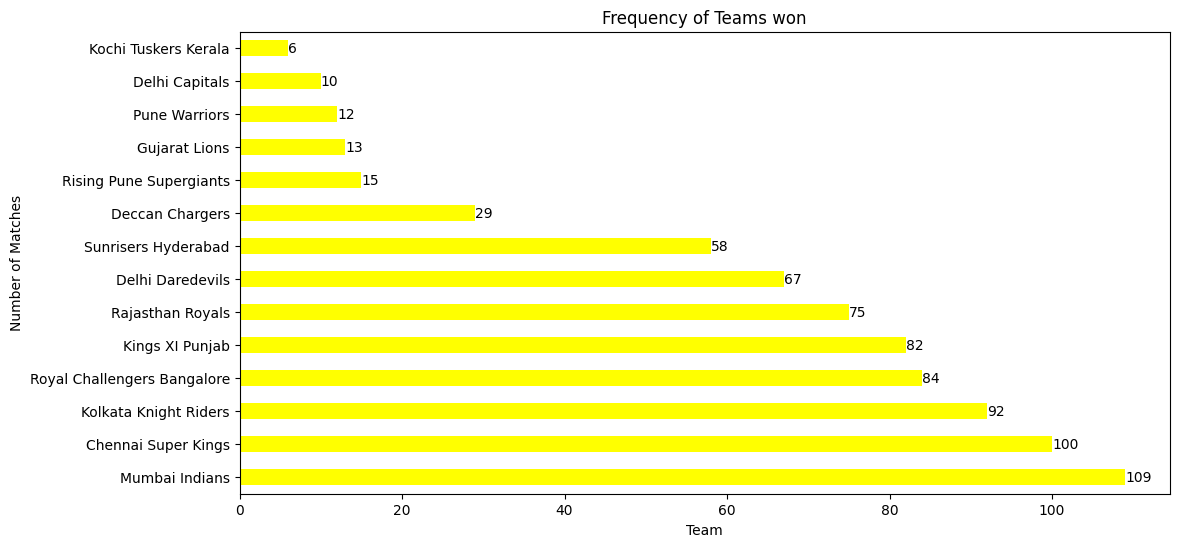

In [142]:
data1 = data.winner.value_counts()
plt.figure(figsize=(12, 6))
barplot = data1.plot(kind='barh', color='yellow')
plt.bar_label(barplot.containers[0])
plt.title('Frequency of Teams won')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.show()

# Bivariate Analysis
## Toss Winner v/s Match Winner

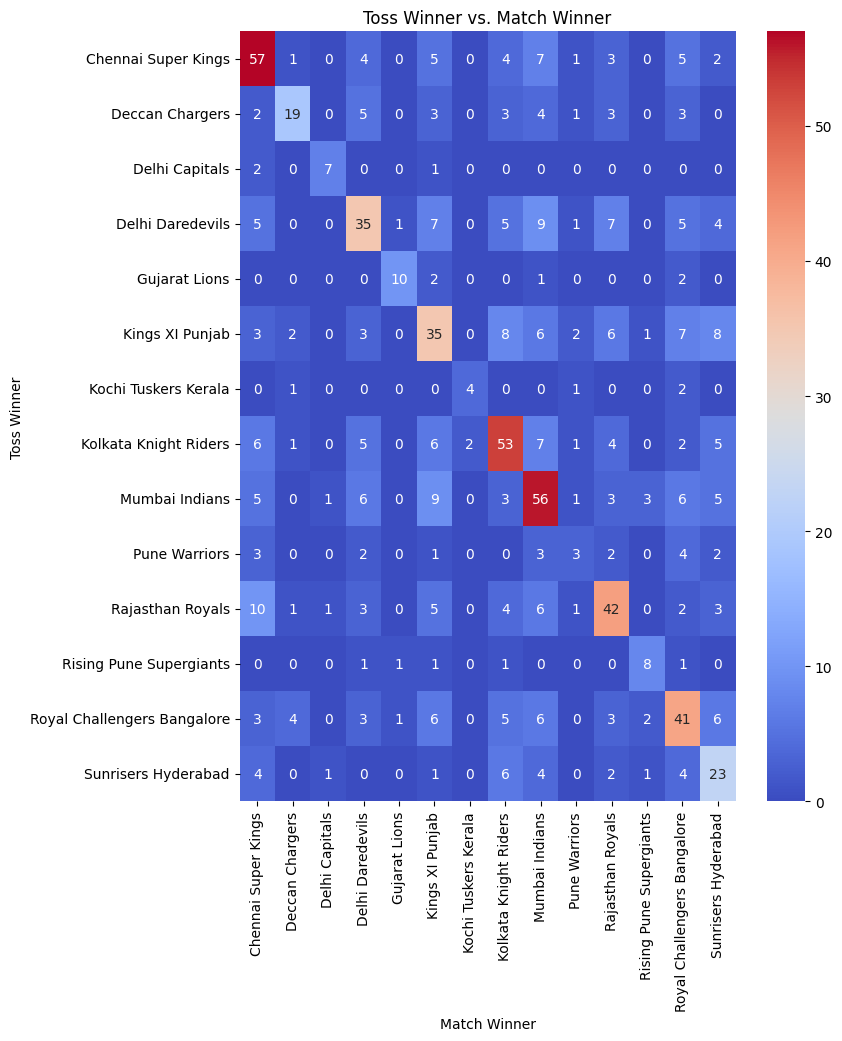

In [143]:
# Create a contingency table or cross-tabulation
contingency_table = pd.crosstab(data['toss_winner'], data['winner'])

# Plot the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Toss Winner vs. Match Winner')
plt.xlabel('Match Winner')
plt.ylabel('Toss Winner')
plt.show()

* Each cell represents the frequency of matches where a particular team won the toss and went on to win the match.
* The x-axis represents the match winner, and the y-axis represents the toss winner.
* Darker cells indicate higher frequencies, suggesting a stronger association between the toss winner and the match winner.

Some Insights:
For example:
* In 57 matches, Team CSK won the toss and also won the match.
* In 1 matche, Team CSK won the toss, but Team Deccan Capitals won the match.
* In 0 matches, Team CSK won the toss, but Team Delhi Capitals won the match.
* And so on.

In [144]:
toss_win_grouped = data.groupby('toss_winner').size().reset_index(name='toss_win_count')
grouped = data.groupby(['toss_winner', 'winner']).size().reset_index(name='count')
lst = []
for index, row in grouped.iterrows():
    # Access data from each column in the current row
    toss_winner = row['toss_winner']
    winner = row['winner']

    if toss_winner == winner:
        lst.append(row['count'])

toss_win_grouped['match_win_count'] = lst
toss_win_grouped['Win Percentage'] = (toss_win_grouped['match_win_count'] / toss_win_grouped['toss_win_count']) * 100

toss_win_grouped.sort_values(by="Win Percentage", ascending = False)

,toss_winner,toss_win_count,match_win_count,Win Percentage
2,Delhi Capitals,10,7,70.000000
4,Gujarat Lions,15,10,66.666667
0,Chennai Super Kings,89,57,64.044944
11,Rising Pune Supergiants,13,8,61.538462
7,Kolkata Knight Riders,92,53,57.608696
8,Mumbai Indians,98,56,57.142857
10,Rajasthan Royals,80,42,52.500000
12,Royal Challengers Bangalore,81,41,50.617284
6,Kochi Tuskers Kerala,8,4,50.000000
13,Sunrisers Hyderabad,46,23,50.000000


## Number of Wins by Each Team in Each Season

In [152]:
def update_plot(selected_team):
    filtered_data = data[data['winner'] == selected_team]
    win_counts = filtered_data.groupby('season')['winner'].count().reset_index(name='win_count')
    
    clear_output(wait=True)
    
    plt.figure(figsize=(10, 5))
    plt.plot(win_counts['season'], win_counts['win_count'], marker='o', linestyle='-', color='skyblue')
    for index, value in win_counts.iterrows():
        plt.text(value['season'], value['win_count'], str(value['win_count']), ha='center', va='bottom')
    
    plt.title(f'Number of Wins by {selected_team} in Each Season')
    plt.xlabel('Season')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

team_options = data['winner'].unique()

team_selector = widgets.Dropdown(
    options=team_options,
    description='Team:',
    disabled=False
)

widgets.interactive(update_plot, selected_team=team_selector)

interactive(children=(Dropdown(description='Team:', options=('Sunrisers Hyderabad', 'Rising Pune Supergiants',…

## Distribution of Wins by Runs and Wickets for Top 10 Teams

In [149]:
def update_plot(top_n, display_option):
    top_teams = data['winner'].value_counts().head(top_n).index
    filtered_data = data[data['winner'].isin(top_teams)]
    team_win_counts = filtered_data.groupby('winner')[['win_by_runs', 'win_by_wickets']].sum().reset_index()

    clear_output(wait=True)
    
    plt.figure(figsize=(10, 4))
    
    if display_option == 'Both':
        plt.bar(team_win_counts['winner'], team_win_counts['win_by_runs'], color='r', label='Win by Runs')
        plt.bar(team_win_counts['winner'], team_win_counts['win_by_wickets'], bottom=team_win_counts['win_by_runs'], color='b', label='Win by Wickets')
        plt.legend()
    elif display_option == 'Win by Runs':
        plt.bar(team_win_counts['winner'], team_win_counts['win_by_runs'], color='r')
        plt.legend(["Win by Runs"])
    else:
        plt.bar(team_win_counts['winner'], team_win_counts['win_by_wickets'], color='b')
        plt.legend(["Win by Wickets"])
    
    plt.title(f'Distribution of Wins for Top {top_n} Teams')
    plt.xlabel('Team')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=90)
    plt.show()

top_n_selector = widgets.IntSlider(
    value=10,
    min=1,
    max=20,
    step=1,
    description='Top N Teams:',
    continuous_update=False
)

display_option_selector = widgets.RadioButtons(
    options=['Both', 'Win by Runs', 'Win by Wickets'],
    value='Both',
    description='Display:',
    disabled=False
)

widgets.interactive(update_plot, top_n=top_n_selector, display_option=display_option_selector)

interactive(children=(IntSlider(value=10, continuous_update=False, description='Top N Teams:', max=20, min=1),…

# Merge the Deliveries dataset and Matches Dataset

In [153]:
merged_df = pd.merge(df,data, left_on='match_id', right_on ='id')
merged_df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


## Runs scored by top 10 players in each season

In [157]:
# Identify the top 10 players based on total runs scored
top_10_players = merged_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).index

top_10_players

Index(['V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan', 'CH Gayle',
       'MS Dhoni', 'RV Uthappa', 'AB de Villiers', 'G Gambhir'],
      dtype='object', name='batsman')

In [160]:
# Identify the top 10 players based on total runs scored
top_10_players = merged_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).index.tolist()

# Function to update the plot based on the selected player
def update_plot(selected_player):
    clear_output(wait=True)
    
    # Filter the data for the selected player
    player_data = merged_df[merged_df['batsman'] == selected_player]
    
    # Create a new figure
    plt.figure(figsize=(8, 3))
    
    # Plot the runs scored by the player in each season
    sns.lineplot(data=player_data, x='season', y='batsman_runs', marker='o')
    
    plt.title(f'Runs Scored by {selected_player} in Each Season')
    plt.xlabel('Season')
    plt.ylabel('Runs Scored')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    plt.show()

# Dropdown widget for selecting a player
player_selector = widgets.Dropdown(
    options=top_10_players,
    value=top_10_players[0],
    description='Player:',
    disabled=False
)

# Interactive widget
interactive_plot = widgets.interactive(update_plot, selected_player=player_selector)
display(interactive_plot)

interactive(children=(Dropdown(description='Player:', options=('V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner'…

In [49]:
merged_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2'],
      dtype='object')

## Win Pecentage of Each Team

In [50]:
team1_matches = data['team1'].value_counts()
team2_matches = data['team2'].value_counts()
total_matches = team1_matches.add(team2_matches, fill_value=0)

# Performance of Each Team
wins = data['winner'].value_counts()
losses = total_matches.subtract(wins, fill_value=0)
win_percentage = (wins / total_matches) * 100

print("Performance of Each Team")
team_performance = pd.DataFrame({
    'Matches Played': total_matches,
    'Wins': wins,
    'Losses': losses,
    'Win Percentage': win_percentage
})
print(team_performance.sort_values(by="Win Percentage", ascending = False))

Performance of Each Team
                             Matches Played  Wins  Losses  Win Percentage
Delhi Capitals                           16    10       6       62.500000
Chennai Super Kings                     164   100      64       60.975610
Mumbai Indians                          187   109      78       58.288770
Sunrisers Hyderabad                     108    58      50       53.703704
Kolkata Knight Riders                   178    92      86       51.685393
Rajasthan Royals                        147    75      72       51.020408
Rising Pune Supergiants                  30    15      15       50.000000
Royal Challengers Bangalore             180    84      96       46.666667
Kings XI Punjab                         176    82      94       46.590909
Gujarat Lions                            30    13      17       43.333333
Kochi Tuskers Kerala                     14     6       8       42.857143
Delhi Daredevils                        161    67      94       41.614907
Deccan Charge

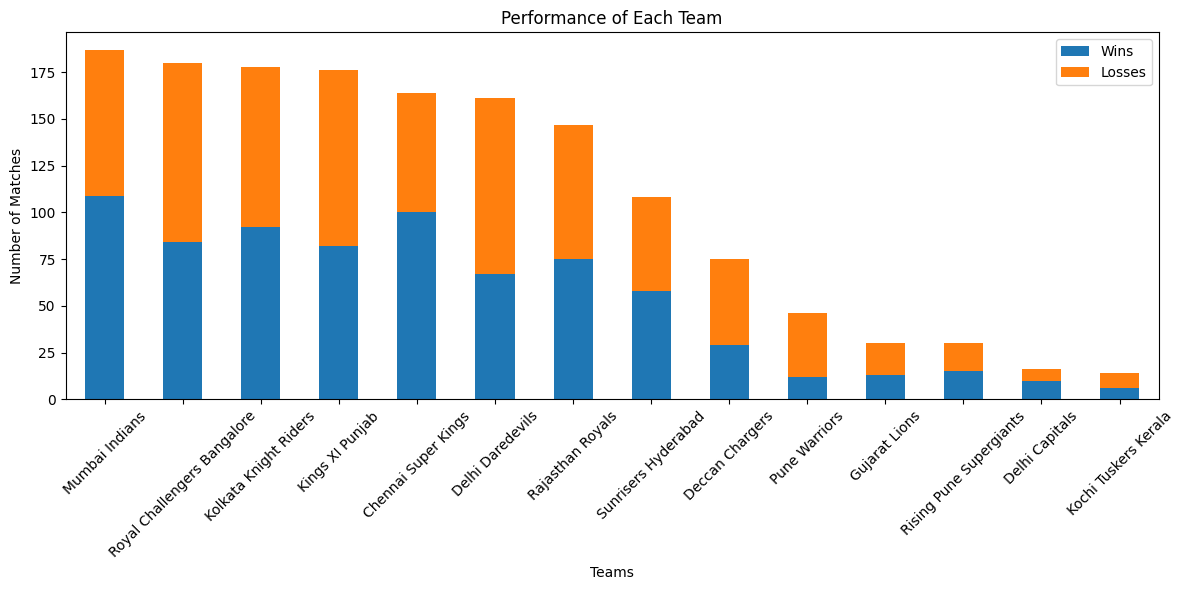

In [51]:
team_performance = team_performance.sort_values(by='Matches Played', ascending=False)

# Plotting stacked bar plot
team_performance[['Wins', 'Losses']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Performance of Each Team')
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(['Wins', 'Losses'])
plt.tight_layout()
plt.show()

## Distribution of choosing fielding or batting after winning the toss

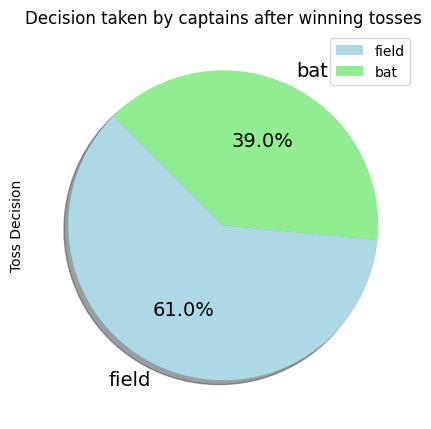

In [52]:
filtered_data = merged_df['toss_decision'].value_counts()
colors = ['lightblue', 'lightgreen']
filtered_data.plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(5,7), shadow=True, startangle=135, legend=True, colors=colors)

plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')
plt.show()

## **Key Findings**

### **Top 5 teams in IPL**
* Mumbai Indians
* Chennai Super Kings
* Kings XI Punjab
* Kolkata Knight Riders
* Royal Challengers Bangalore

### **Top 5 Batsman in IPL**
* **Royal Challengers Bangalore**
    * CH Gayle
    * Virat kohli
    * AB de Villiers
* **Gujrat Loins**
    * SK Raina
* **Mumbai Indians**
    * RG Sharma

### **Top 5 Bowlers in IPL**
* **Mumbai Indians**
    * SL Malinga
    * DJ Bravo
    * Harbhajan Singh
* **Delhi Daredevils**
    * A Mishra
* **Kolkata Night Riders**
    * PP Chawla


### **Top 10 Filders**
    * AB de Villiers
    * KA Pollard
    * KD Dhoni
    * MS Dhoni
    * PA Patel
    * RG Sharma
    * RV Uthappa
    * SK Raina
    * Virat Kohli
    * WP Saha

### **Top 5 Players of the Match**
* **Royal Challengers Bangalore**
    * CH Gayle
    * AB de Villiers 
* **Mumbai Indians**
    * RG Sharma
* **Chennai Super Kings**
    * MS Dhoni
* **Sunrisers Hyderabad**
    * DA Warner

* Most of the Matches were played in **Mumbai**. It also has maximum stadiums (3) where IPL matches were played.
* Winning the toss may have some effect on winning the match, sinces the team can choose to either bat or field first
* Most of the Matchers are won my scoring high runs.

### **Players with increasing performance**
* Virat Kohli
* S Dhawan
* CH Ghayle
* AB de Villers